# Project — Fraud Detection Prediction

## Introduction
Welcome to the fraud detection project for a financial transactions dataset.  
In this project, we aim to develop a predictive model to **identify fraudulent transactions** in financial data.  

This project is crucial for financial institutions to proactively detect and prevent fraud, minimizing financial losses and enhancing security.

---

## Problem Statement
Fraudulent transactions pose a significant challenge for financial institutions, leading to **substantial monetary losses** and **erosion of customer trust**.  

Accurately predicting fraud is essential to mitigate these risks.  

**Objective:**  
Predict whether a transaction is **fraudulent (`isFraud = 1`)** or **legitimate (`isFraud = 0`)**.  

By accurately predicting fraud, institutions can implement **targeted prevention strategies** to reduce fraudulent activities and improve overall security.

---

## Dataset Description
The dataset contains information on **financial transactions**, including both fraudulent and legitimate ones.

**Key specifications:**
- Key dataset specifications: 11142 rows × 10 columns



**Attributes:**

| Attribute        | Description |
|------------------|-------------|
| `step`           | Numerical value representing the time step of the transaction |
| `type`           | Type of transaction (`DEBIT`, `TRANSFER`, `CASH_OUT`, `PAYMENT`),`CASH_IN`|
| `amount`         | Transaction amount |
| `nameOrig`       | Originator's account identifier |
| `oldbalanceOrg`  | Originator's balance **before** the transaction |
| `newbalanceOrig` | Originator's balance **after** the transaction |
| `nameDest`       | Destination's account identifier |
| `oldbalanceDest` | Destination's balance **before** the transaction |
| `newbalanceDest` | Destination's balance **after** the transaction |
| `isFraud`        | Target variable — whether the transaction is fraudulent (`1 = yes`, `0 = no`) |

---

## Type of ML Task
This project is a **supervised classification problem**.  
We aim to build a model that can classify transactions as either:
- **Fraudulent** (`isFraud = 1`)
- **Legitimate** (`isFraud = 0`)

The trained model can then be used by financial institutions to **flag suspicious transactions in real time**.

# 1️⃣ Import Libraries
### This section imports all the required Python libraries for data manipulation, visualization, machine learning models, and evaluation metrics. It also sets up some display preferences for better-looking plots.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    average_precision_score, RocCurveDisplay, PrecisionRecallDisplay
)
import joblib

# Display tweaks
sns.set(style='darkgrid', palette='deep', font_scale=1.2)
%matplotlib inline
print('Libraries imported')

Libraries imported


# 2️⃣ Load Dataset
### Here, we load the fraud detection dataset into a pandas DataFrame, clean up column names, and display basic information like shape and first few rows to ensure it loaded correctly.


In [21]:
df = pd.read_csv('Fraud_Analysis_Dataset.csv')
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())
print("Dataset shape:", df.shape)
display(df.head())

Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
Dataset shape: (11142, 10)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1


# 3️⃣ Exploratory Data Analysis (EDA)
### We perform an initial analysis to understand the data:
	•	Check column types, summary statistics, and missing values.
	•	Examine class distribution (isFraud) to see if the dataset is imbalanced.
	•	Visualize fraud vs legitimate transactions using a pie chart.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min       

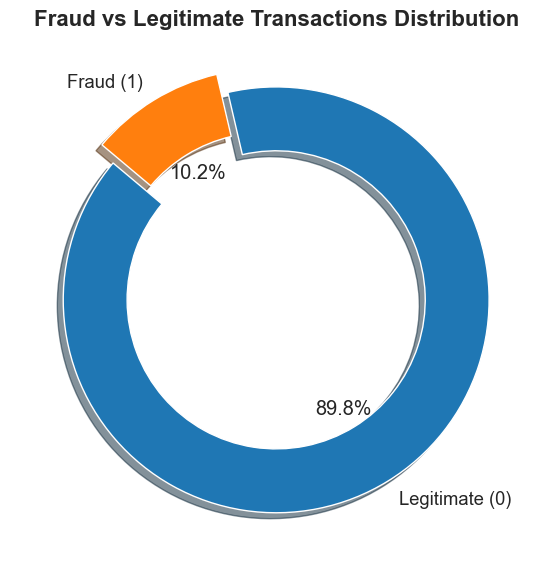

In [22]:
print(df.info())
print(df.describe())
print("Missing Values:\n", df.isnull().sum())
print("Fraud rate (isFraud):\n", df['isFraud'].value_counts(normalize=True))

# Pie Chart for Fraud Distribution
fig, ax = plt.subplots(figsize=(8, 6))
fraud_dist = df['isFraud'].value_counts(normalize=True)
labels = ['Legitimate (0)', 'Fraud (1)']
colors = ['#1f77b4', '#ff7f0e']
explode = (0, 0.1)
ax.pie(fraud_dist, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode,
       shadow=True, startangle=140, wedgeprops=dict(width=0.3, edgecolor='w'))
ax.set_title('Fraud vs Legitimate Transactions Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Distribution of Key Numeric Features
### This section plots histograms for numeric columns (like amount, balances) to observe their distribution for fraud vs legitimate transactions. Helps detect skewness and patterns.

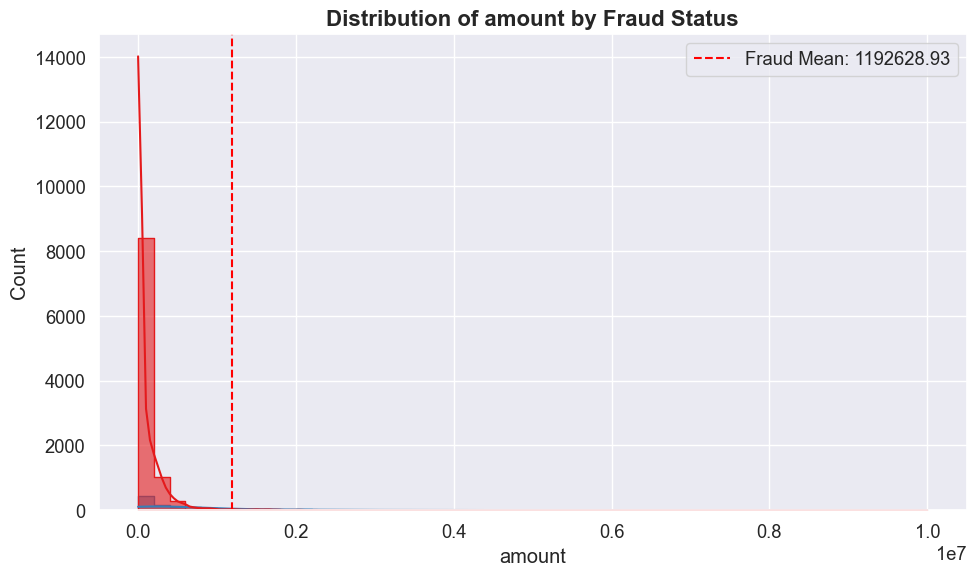

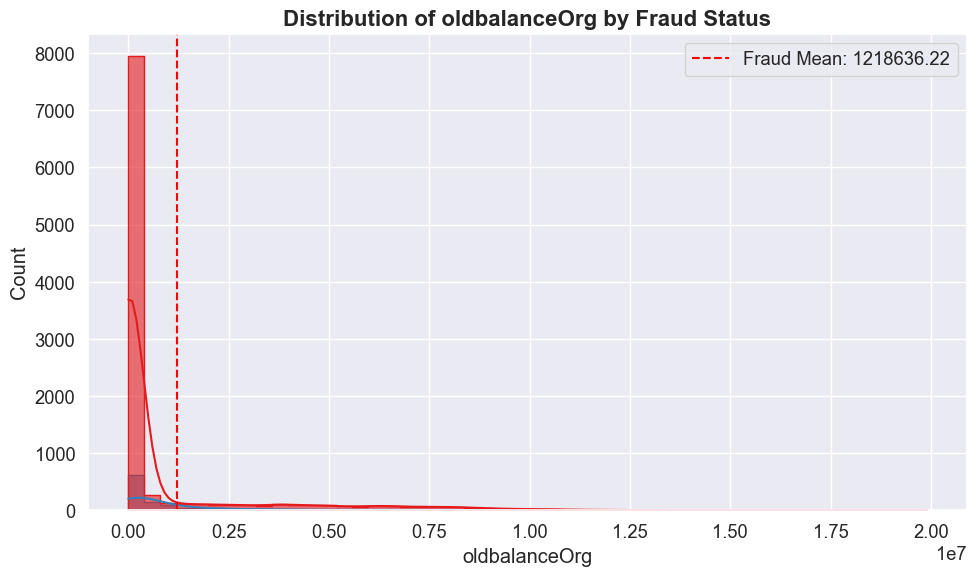

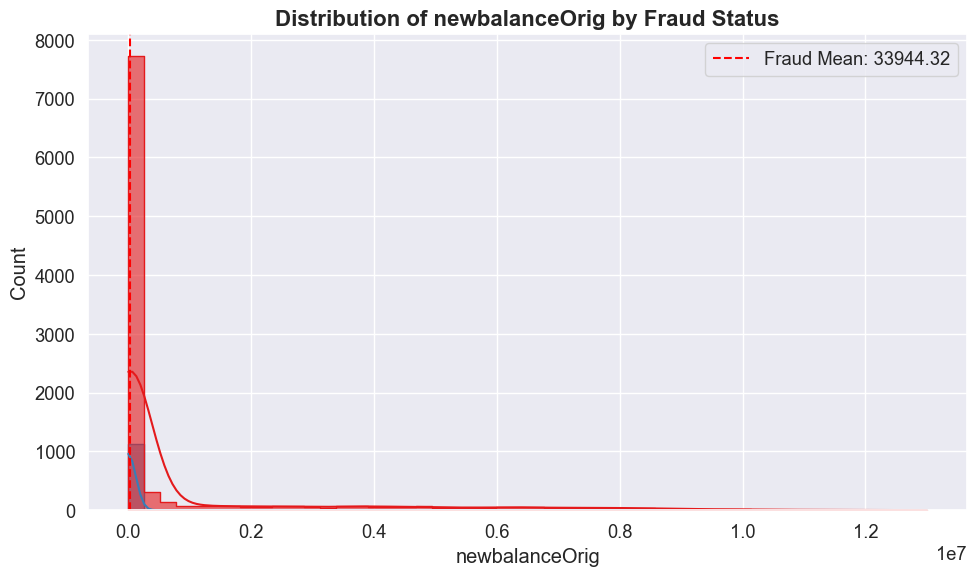

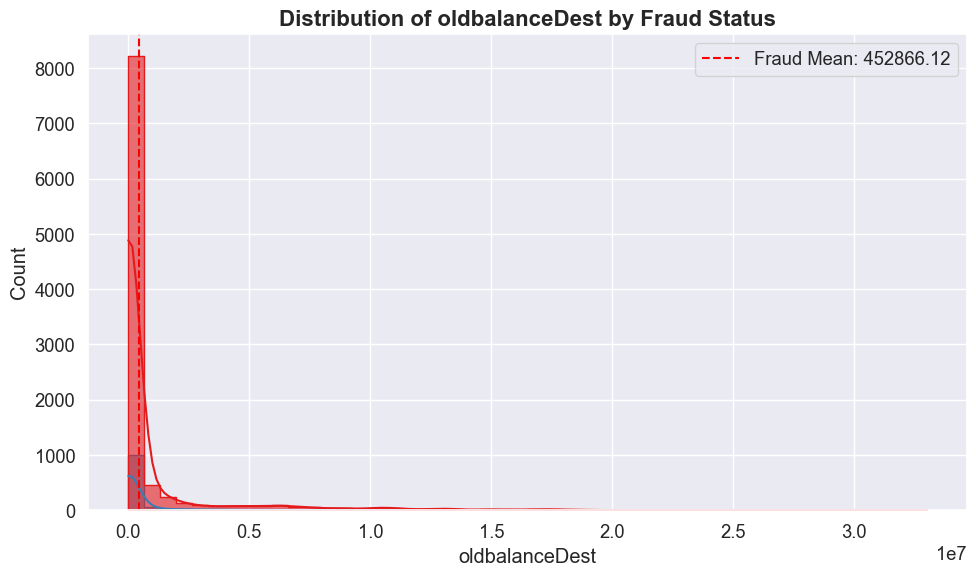

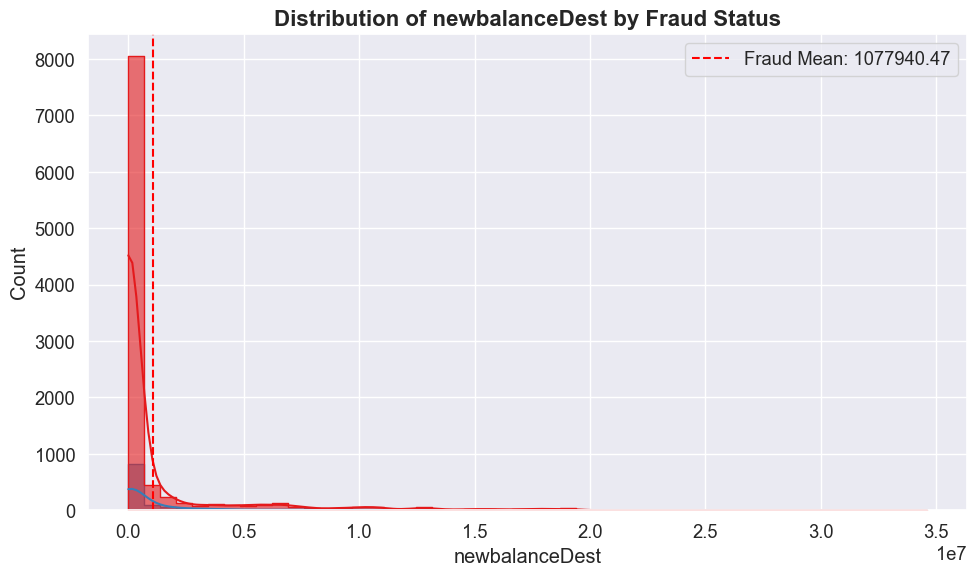

In [23]:
key_numeric_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in key_numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='isFraud', kde=True, palette='Set1', bins=50, alpha=0.6, element='step')
    plt.title(f'Distribution of {col} by Fraud Status', fontsize=16, fontweight='bold')
    mean_fraud = df[df['isFraud']==1][col].mean()
    plt.axvline(mean_fraud, color='red', linestyle='--', label=f'Fraud Mean: {mean_fraud:.2f}')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Boxplot by Transaction Type
### We use boxplots (log-scaled) to compare transaction amounts across transaction types (CASH_IN, TRANSFER, etc.) and highlight potential outliers or fraud patterns.

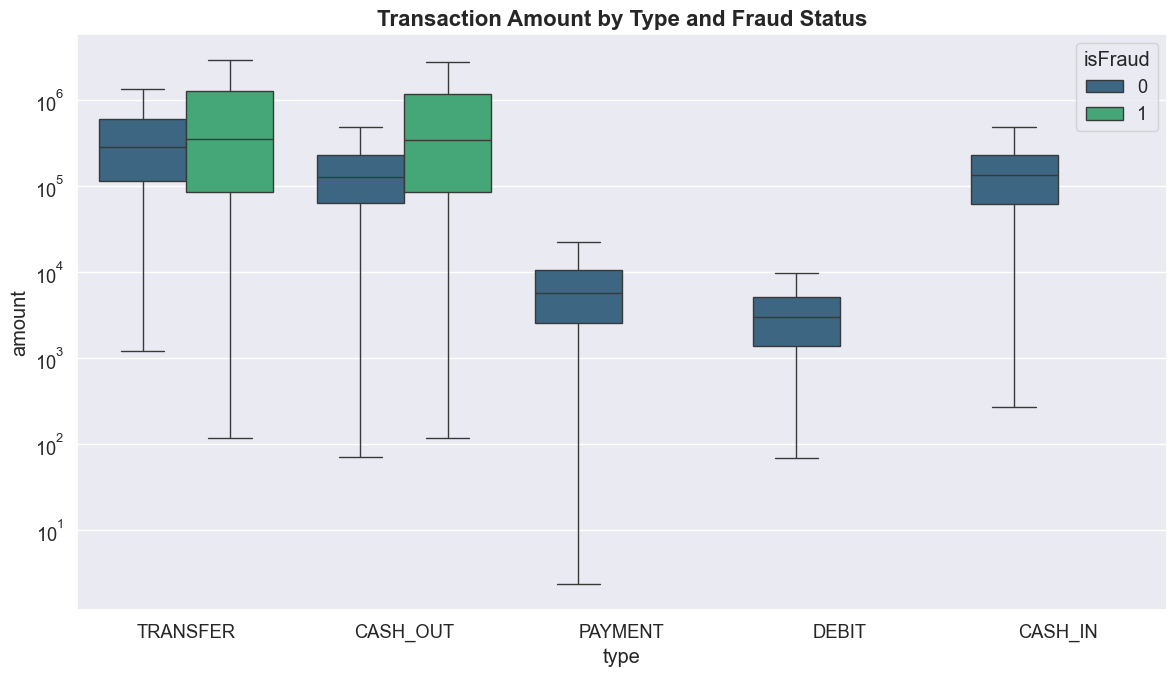

In [24]:
if 'type' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df, x='type', y='amount', hue='isFraud', palette='viridis', showfliers=False)
    plt.yscale('log')
    plt.title('Transaction Amount by Type and Fraud Status', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Correlation Heatmap
### This heatmap shows correlations between numeric features to identify relationships, redundant features, and potentially important predictors of fraud.

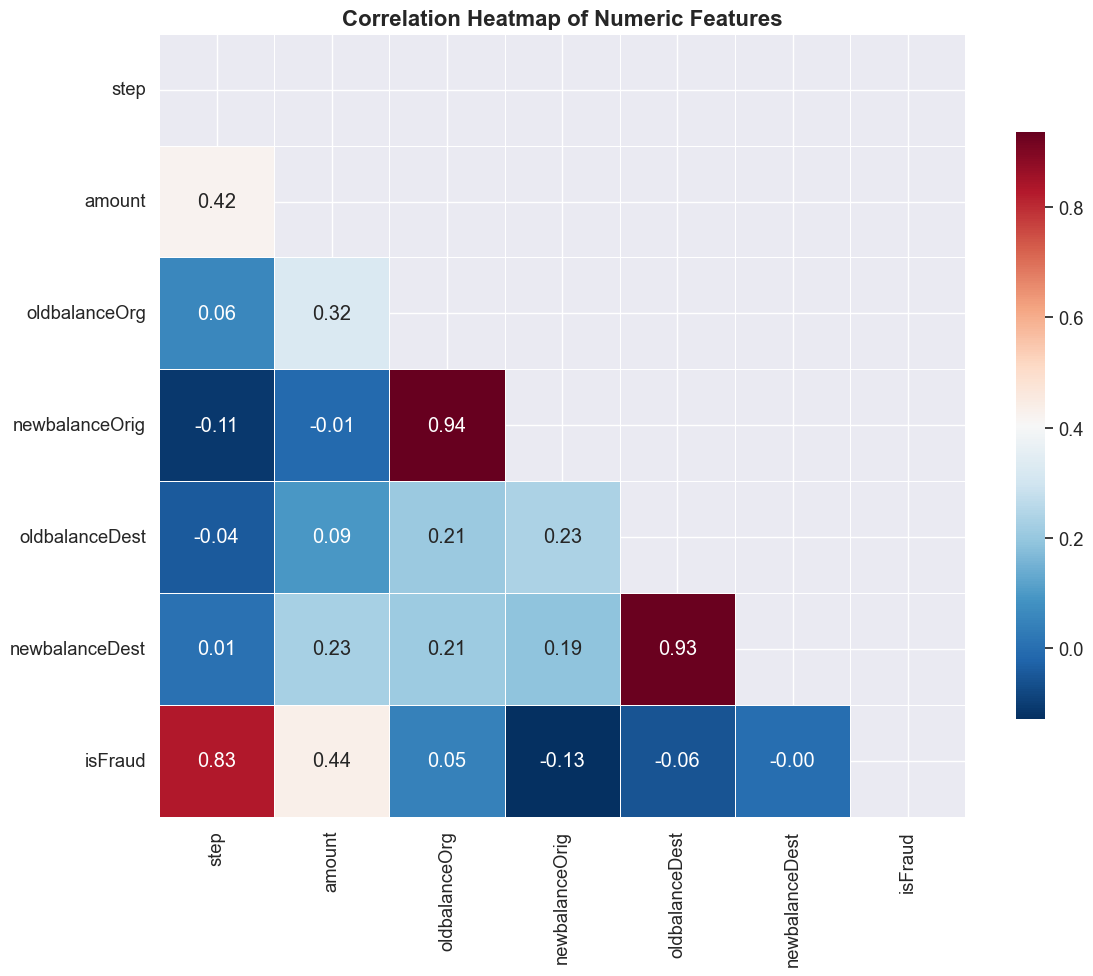

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 10))
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='RdBu_r', mask=mask,
            linewidths=0.5, linecolor='white', cbar_kws={'shrink':0.75})
plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4️⃣ Data Cleaning & Outliers 
### Here, we remove missing values and clip extreme outliers in amount (top 1%) to make the model more robust and prevent skewed training. Then we visualize the cleaned amount distribution.



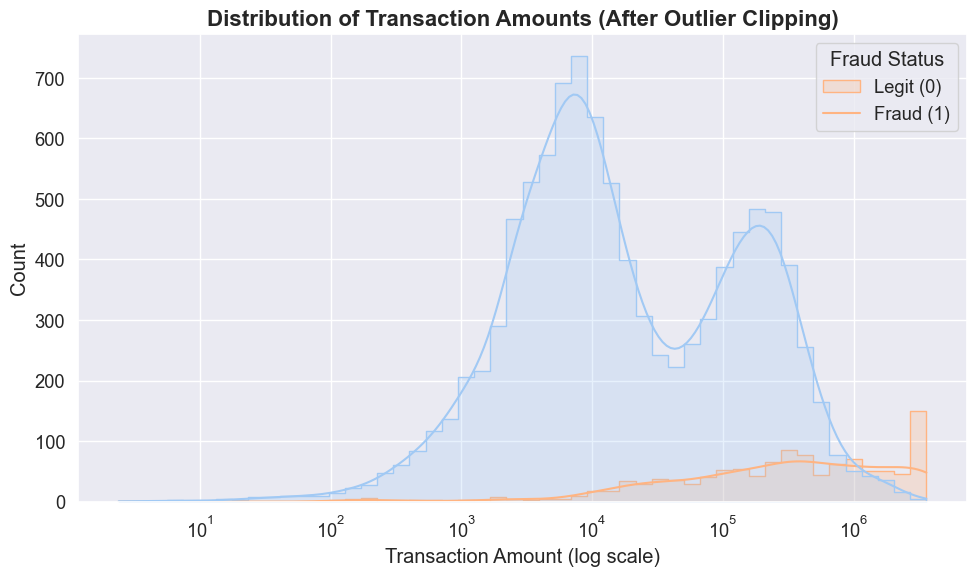

In [26]:
# 🧹 Data Cleaning & Outlier Handling
df = df.dropna()

if 'amount' in df.columns:
    upper = df['amount'].quantile(0.99)
    df['amount'] = np.clip(df['amount'], None, upper)

# 📈 Histogram (Distribution by Fraud Status)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='amount', hue='isFraud', bins=50, kde=True, palette='pastel', element='step', log_scale=True)
plt.title('Distribution of Transaction Amounts (After Outlier Clipping)', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amount (log scale)')
plt.ylabel('Count')
plt.legend(title='Fraud Status', labels=['Legit (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

# 5️⃣ Feature Engineering
### This step creates new features to improve model performance:
	•	Time-based features (hour, day_of_week, is_weekend) from step.
	•	Balance difference between sender and receiver.
	•	Log transformations of skewed numeric variables.
	•	User-level features (transaction count and average amount per user).
	•	One-hot encoding of categorical variables (type).
### Finally, we define our X (features) and y (target).


In [27]:
if 'step' in df.columns:
    df['hour'] = df['step'] % 24
    df['day_of_week'] = (df['step'] // 24) % 7
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

if 'oldbalanceOrg' in df.columns and 'oldbalanceDest' in df.columns:
    df['balance_diff'] = np.abs(df['oldbalanceDest'] - df['oldbalanceOrg'])

if 'amount' in df.columns:
    df['amount_log'] = np.log1p(df['amount'])
if 'oldbalanceOrg' in df.columns:
    df['oldbalanceOrg_log'] = np.log1p(df['oldbalanceOrg'])

if 'nameOrig' in df.columns and 'amount' in df.columns:
    df['txn_count_per_user'] = df.groupby('nameOrig')['nameOrig'].transform('count')
    df['avg_amount_per_user'] = df.groupby('nameOrig')['amount'].transform('mean')

if 'type' in df.columns:
    df = pd.get_dummies(df, columns=['type'], drop_first=True)

features = ['amount_log', 'hour', 'day_of_week', 'is_weekend', 'balance_diff',
            'oldbalanceOrg_log', 'txn_count_per_user', 'avg_amount_per_user'] + \
           [col for col in df.columns if col.startswith('type_')]
X = df[features]
y = df['isFraud']

# 6️⃣ Train-Test Split & SMOTE 
### We split the data into training and test sets (time-based if step exists).
### Then, we apply SMOTE (Synthetic Minority Oversampling Technique) to handle class imbalance by generating synthetic fraud samples for better model learning.

In [28]:
import warnings
# Suppress specific non-critical warnings
warnings.filterwarnings("ignore", message=".*BaseEstimator._validate_data.*")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 🧹 Train-Test Split (Time-Aware if 'step' Exists)
if 'step' in df.columns:
    df_sorted = df.sort_values('step').reset_index(drop=True)
    split_idx = int(0.8 * len(df_sorted))
    X_train = df_sorted[:split_idx][features]
    y_train = df_sorted[:split_idx]['isFraud']
    X_test = df_sorted[split_idx:][features]
    y_test = df_sorted[split_idx:]['isFraud']
else:
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

# ⚖️ SMOTE Oversampling (Balances Minority Class)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 7️⃣ Model Training & Evaluation
### We train multiple models (Logistic Regression, Decision Tree, Random Forest, XGBoost) using a pipeline with standardization.
 ### For each model we:
	•	Fit on balanced training data.
	•	Predict on test data.
	•	Calculate metrics: Accuracy, Precision, Recall, F1, PR-AUC, ROC-AUC.
	•	Show classification report, confusion matrix, and ROC/PR curves.


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1153
           1       0.94      0.67      0.78      1076

    accuracy                           0.82      2229
   macro avg       0.85      0.81      0.81      2229
weighted avg       0.84      0.82      0.81      2229



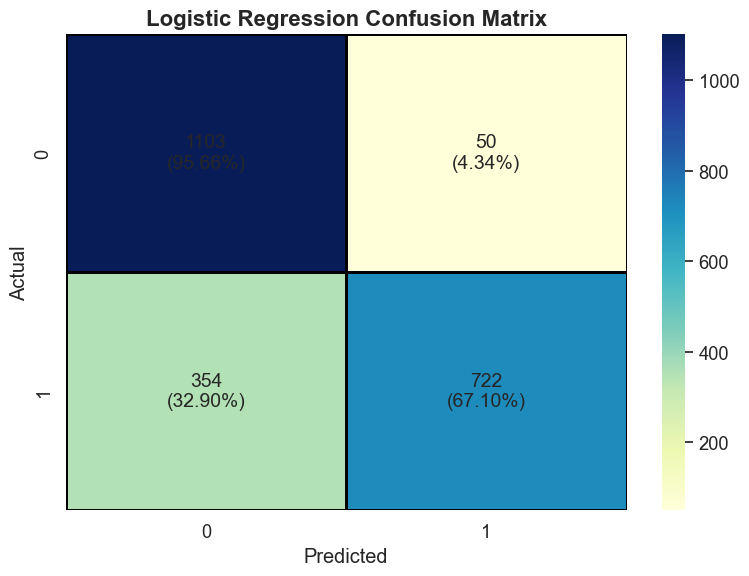

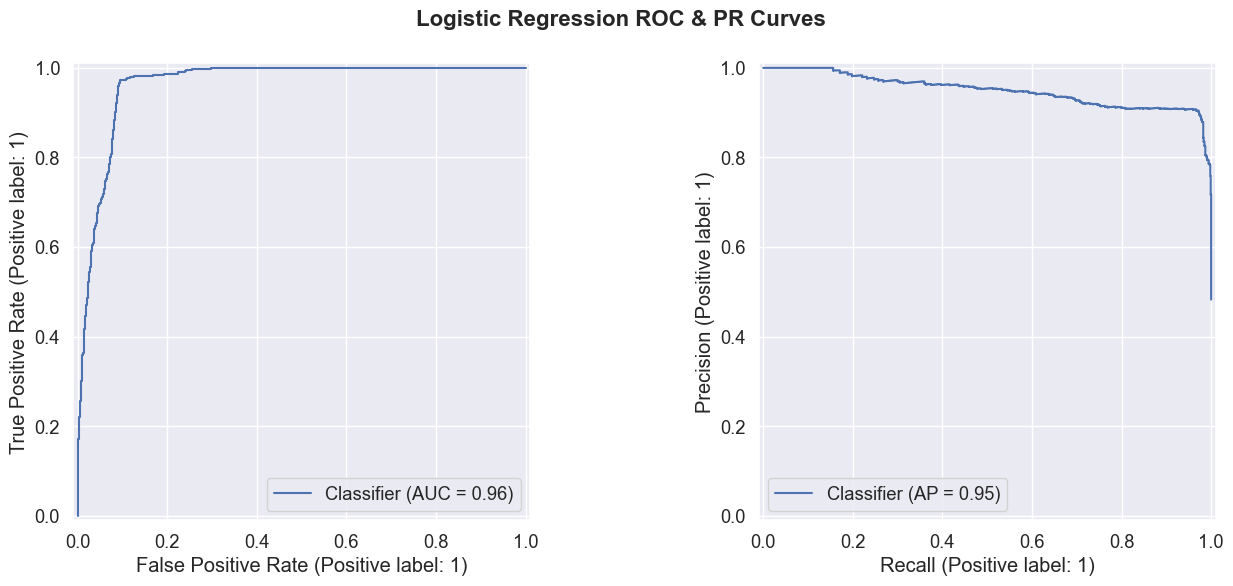


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      1153
           1       0.99      0.13      0.22      1076

    accuracy                           0.58      2229
   macro avg       0.77      0.56      0.47      2229
weighted avg       0.76      0.58      0.48      2229



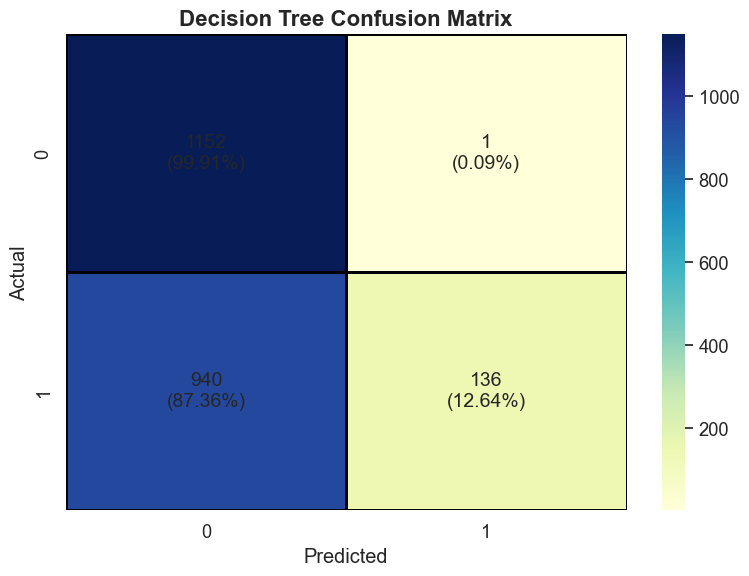

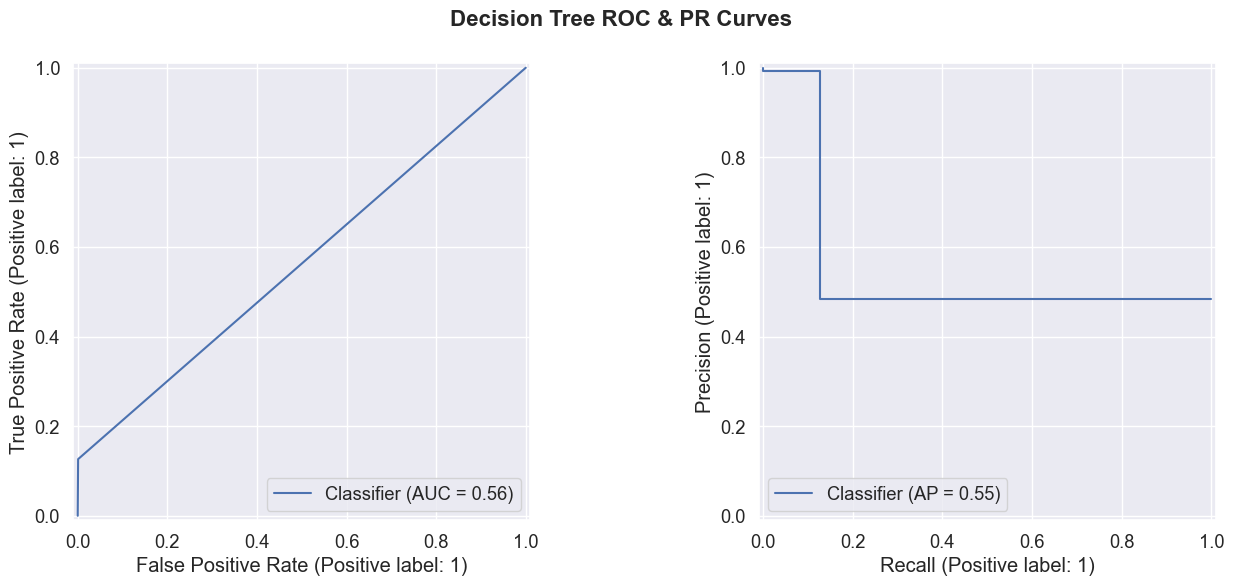


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1153
           1       1.00      0.09      0.17      1076

    accuracy                           0.56      2229
   macro avg       0.77      0.55      0.44      2229
weighted avg       0.76      0.56      0.45      2229



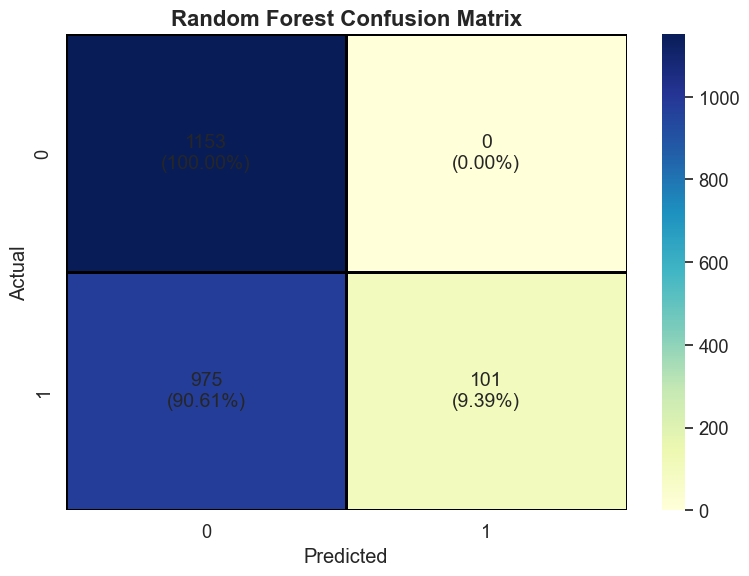

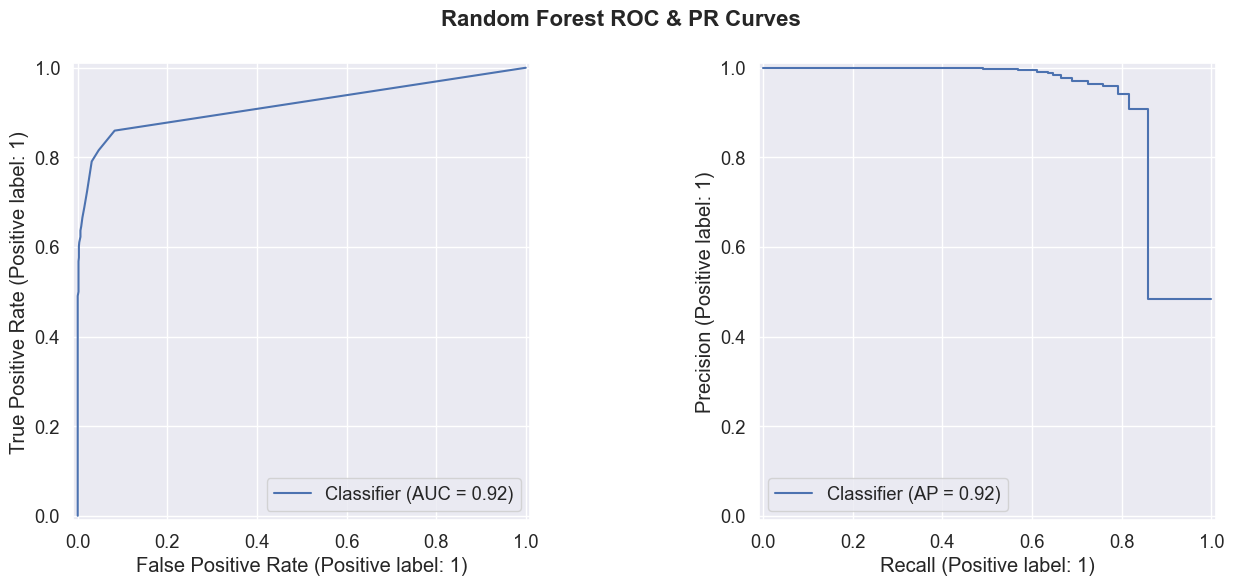


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      1153
           1       1.00      0.29      0.45      1076

    accuracy                           0.66      2229
   macro avg       0.80      0.64      0.60      2229
weighted avg       0.79      0.66      0.60      2229



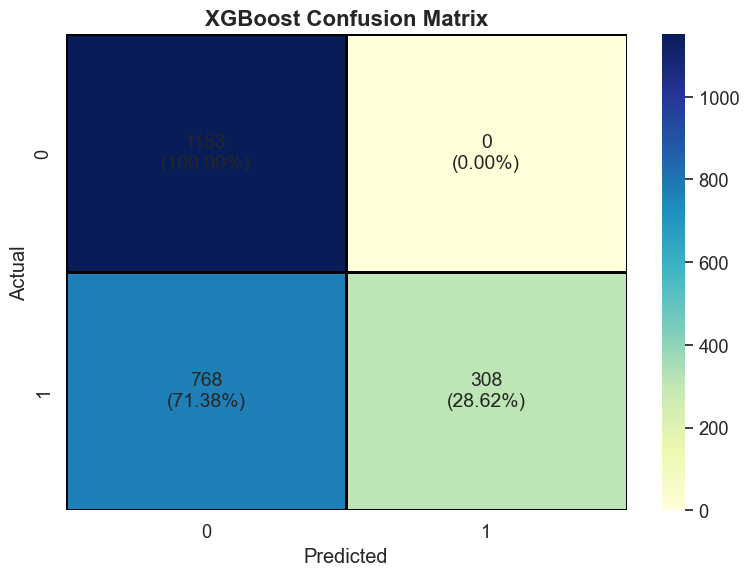

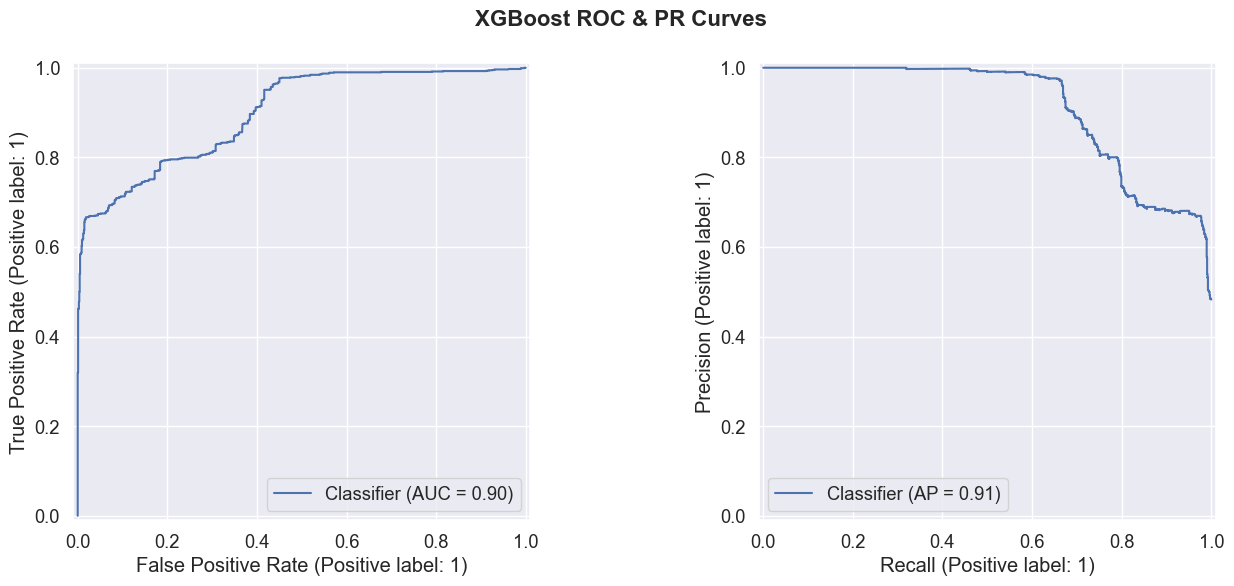

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42,
                             scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]))
}

results = []

def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    fig, ax = plt.subplots(figsize=(8,6))
    sns.heatmap(cm, annot=False, cmap='YlGnBu', ax=ax, linewidths=1, linecolor='black')
    ax.set_title(title, fontsize=16, fontweight='bold')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    for i in range(2):
        for j in range(2):
            ax.text(j+0.5, i+0.5, f'{cm[i,j]}\n({cm_norm[i,j]:.2f}%)', ha='center', va='center', fontsize=14)
    plt.tight_layout()
    plt.show()

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('classifier', model)])
    pipe.fit(X_train_bal, y_train_bal)
    y_pred = pipe.predict(X_test)
    y_pred_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe, "predict_proba") else None
    
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred),4),
        "Precision": round(precision_score(y_test, y_pred),4),
        "Recall": round(recall_score(y_test, y_pred),4),
        "F1 Score": round(f1_score(y_test, y_pred),4),
        "PR-AUC": round(average_precision_score(y_test, y_pred_proba),4) if y_pred_proba is not None else None,
        "ROC-AUC": round(roc_auc_score(y_test, y_pred_proba),4) if y_pred_proba is not None else None
    })
    
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion(y_test, y_pred, f'{name} Confusion Matrix')
    
    if y_pred_proba is not None:
        fig, ax = plt.subplots(1,2, figsize=(14,6))
        RocCurveDisplay.from_predictions(y_test, y_pred_proba, ax=ax[0])
        PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba, ax=ax[1])
        plt.suptitle(f'{name} ROC & PR Curves', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# 8️⃣ Results Table
### This section aggregates model performance metrics into a single table for easy comparison.


In [30]:
results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score,PR-AUC,ROC-AUC
0,Logistic Regression,0.8188,0.9352,0.6710,0.7814,0.9498,0.9637
1,Decision Tree,0.5778,0.9927,0.1264,0.2242,0.5472,0.5628
2,Random Forest,0.5626,1.0000,0.0939,0.1716,0.9166,0.9170
3,XGBoost,0.6555,1.0000,0.2862,0.4451,0.9119,0.8985


## Feature Importance (XGBoost)
### Here, we visualize the top 10 most important features as determined by XGBoost to understand which variables contribute most to fraud detection.


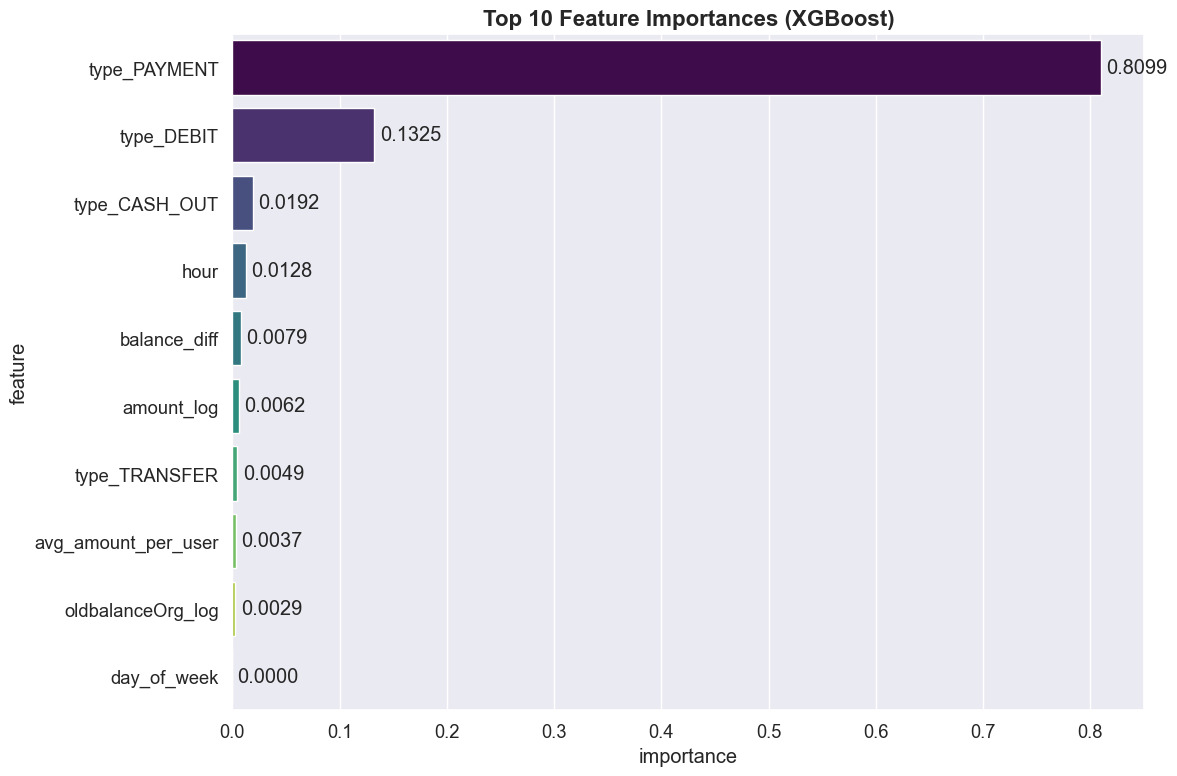

In [31]:
from matplotlib import cm

best_pipe = Pipeline([('scaler', StandardScaler()), ('classifier', models["XGBoost"])])
best_pipe.fit(X_train_bal, y_train_bal)
xgb_model_in_pipe = best_pipe.named_steps['classifier']

# Get feature importances
importances = xgb_model_in_pipe.feature_importances_
feature_imp = pd.DataFrame({'feature': features, 'importance': importances}).sort_values('importance', ascending=False)

# Create a color map for top 10 features
top_features = feature_imp.head(10)
colors = cm.viridis(np.linspace(0, 1, len(top_features)))

plt.figure(figsize=(12,8))
bars = sns.barplot(
    x='importance', 
    y='feature', 
    data=top_features, 
    palette=colors  # gradient from viridis
)
plt.title('Top 10 Feature Importances (XGBoost)', fontsize=16, fontweight='bold')

# Add text labels
for bar in bars.patches:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.4f}', va='center')

plt.tight_layout()
plt.show()

# 9️⃣ Save Best Model
### We identify the best-performing model (based on F1-score) and save it as a .pkl file for future use (deployment, inference).


In [32]:
best_model_name = results_df.loc[results_df['F1 Score'].idxmax(), 'Model']
best_model = models[best_model_name]
joblib.dump(Pipeline([('scaler', StandardScaler()), ('classifier', best_model)]), 'best_fraud_model.pkl')
print(f"Best model ({best_model_name}) saved as 'best_fraud_model.pkl'")

Best model (Logistic Regression) saved as 'best_fraud_model.pkl'
